In [31]:
import pandas as pd 
import numpy as np 
import scipy as scp
import graphviz as gviz
from funcoes import append_manual,array_df,click_list,inicia_browser

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression


from bs4 import BeautifulSoup 
import requests as rq 
import re

from selenium import webdriver

import platform

### inicia_browser()
Uma função que retorna uma variavel do tipo WebDriver
de acordo com o S.O.

### array_df()
Função que pega lista mal estruturada
E retorna uma lista para ser transformada
em DataFrame

### append_manual()
Função que da um append por quantidade pois
É variavil o valor da array que usamos
E evista-se o uso de um for.



In [9]:
lista_Links_Tabela = []
url = "https://www.reclameaqui.com.br/ranking/"
browser = inicia_browser()
browser.get(url)
boxes_rankings = browser.find_elements_by_xpath('//div[@class="box-gray"]')
for box in boxes_rankings:
    lista_Empresas_Ranking =box.find_elements_by_xpath('.//li[@class="ng-scope"]')
    #titulo_box = box.find_element_by_xpath("//h2[@class='ng-binding']")
    titulo=box.find_element_by_tag_name('h2')
    numb = 1
    for empresa_no_ranking in lista_Empresas_Ranking:
        empresa = empresa_no_ranking.find_element_by_xpath('.//a[@class="business-name ng-binding ng-scope"]')
        link = empresa.get_attribute("href")
        if(any(link in i for i in lista_Links_Tabela)):
            for i in lista_Links_Tabela:
                if link in i:
                    i.append(titulo.text+':'+str(numb))
                    break;
        else:
            lista_Links_Tabela.append([link,titulo.text+':'+str(numb)])
        numb+=1
browser.close()
browser.quit()

In [10]:
list_p_list_df = []
for t_lks_rnk in lista_Links_Tabela:
    try:
        url_empresa = t_lks_rnk[0]
        browser = inicia_browser()
        browser.get(url_empresa)
        botao = browser.find_elements_by_xpath('//li[@ng-class="getClassReputation(\'LAST_THREE_YEARS\')"]')
        style_display_block = browser.find_element_by_xpath('//*[@id="modal-popupbounce-v1"]')
        style_display_block = style_display_block.get_attribute('style') != ''
        if(style_display_block):
        
            click_list(browser.find_element_by_xpath('//*[@id="modal-popupbounce-v1"]').find_elements_by_xpath('//button[@aria-label="Close"]')).click()
            click_list(browser.find_elements_by_xpath('//li[@ng-class="getClassReputation(\'LAST_THREE_YEARS\')"]')).click()
        else:
            click_list(browser.find_elements_by_xpath('//li[@ng-class="getClassReputation(\'LAST_THREE_YEARS\')"]')).click()
        box_avaliacoes = browser.find_elements_by_xpath('//div[@class="col-xs-5 col-sm-3 flexbox-col"]')
        nome = browser.find_element_by_xpath('//h1[@class="big-title ng-binding"]').text
        ra = box_avaliacoes[0].text.split("\n")[0]
        vfn = box_avaliacoes[1].text.split("\n")[0]
        isol = box_avaliacoes[2].text.split("\n")[0]
        nota = box_avaliacoes[3].text.split("\n")[0]
        rcl = browser.find_element_by_xpath('//div[@class="all-complaints col-sm-2 flexbox-col"]').find_element_by_xpath('.//p[@class="medium-title text-red ng-binding"]').text
        resp = browser.find_element_by_xpath('//div[@class="complaints-answered col-sm-2 flexbox-col"]').find_element_by_xpath('.//p[@class="medium-title text-green ng-binding"]').text
        nresp = browser.find_element_by_xpath('//div[@class="complaints-unanswered col-sm-2 flexbox-col"]').find_element_by_xpath('.//p[@class="medium-title text-red ng-binding"]').text
        ava = browser.find_element_by_xpath('//div[@class="all-ratings col-sm-2 flexbox-col"]').find_element_by_xpath('.//p[@class="medium-title text-green ng-binding"]').text
        if browser.find_element_by_xpath('//div[@class="reply-time col-sm-4 flexbox-col"]').find_element_by_xpath('//p[@ng-show="business.selectedCompanyIndex.averageAnswerTime == 0 ||business.selectedCompanyIndex.averageAnswerTime == undefined"]').text == '':
            tmpmr = browser.find_element_by_xpath('//div[@class="reply-time col-sm-4 flexbox-col"]').find_element_by_xpath('.//p[@ng-show="business.selectedCompanyIndex.averageAnswerTime > 0"]').text
        else:
            tmpmr = browser.find_element_by_xpath('//div[@class="reply-time col-sm-4 flexbox-col"]').find_element_by_xpath('.//p[@ng-show="business.selectedCompanyIndex.averageAnswerTime == 0 ||business.selectedCompanyIndex.averageAnswerTime == undefined"]').text
        list_p_list_df.append(append_manual(len(t_lks_rnk),t_lks_rnk,[nome, ra, vfn, isol, nota, rcl, resp, nresp, ava, tmpmr]))
        browser.close()
        browser.quit()
    except Exception as erro:
        print('Erro durante a raspagem.')
        print(t_lks_rnk)
        print('--------------------------------')
        print(erro)
        browser.close()
        browser.quit()

Erro durante a raspagem.
['https://www.reclameaqui.com.br/empresa/oulala-deals/', 'Empresas recém-cadastradas com mais reclamações:1']
--------------------------------
'NoneType' object has no attribute 'click'
Erro durante a raspagem.
['https://www.reclameaqui.com.br/empresa/makro-varejista/', 'Empresas recém-cadastradas com mais reclamações:2']
--------------------------------
'NoneType' object has no attribute 'click'
Erro durante a raspagem.
['https://www.reclameaqui.com.br/empresa/maximus-digital_201318/', 'Empresas recém-cadastradas com mais reclamações:3']
--------------------------------
'NoneType' object has no attribute 'click'
Erro durante a raspagem.
['https://www.reclameaqui.com.br/empresa/ricardo-eletro-loja-online/', 'Mais Reclamadas do dia:20', 'Mais Reclamadas da semana:20']
--------------------------------
'NoneType' object has no attribute 'click'


In [11]:
tabela_recaqui = []
for ra_empresas in list_p_list_df:
    tabela_recaqui.append(dict(zip(['nome_empresa','ra','vfn','is','nota','rcl','resp','nresp','ava','tempmr','mis','mivfn','mnm','mrutd','mrudm','peutd','mrecudm','ercmr','mrd','mrs','mrecutd'],array_df(ra_empresas))))
df_tabela_recaqui = pd.DataFrame(tabela_recaqui,columns=['nome_empresa','ra','vfn','is','nota','rcl','resp','nresp','ava','tempmr','mis','mivfn','mnm','mrutd','mrudm','peutd','mrecudm','ercmr','mrd','mrs','mrecutd'])

# dataframe tabela reclame aqui

### Legendas:
* indices das empresas
    - **ra** - Reclamações atendidas, em porcentagem<br>
    - **vfn** - Voltaria a fazer negócio<br>
    - **is** - Índicede solução<br>
    - **nota** - Nota da empresa<br>
    - **rcl** - Número de reclamações<br>
    - **resp** - Reclamações respondidas<br>
    - **nresp** - Reclaçaões não respondidas<br>
    - **ava** - Quantidade de avaliações<br><br>

* Tops rankings
    - **mis** -  Melhor índice de solução<br> 
    - **mivfn** - Melhores Índices de Voltar a Fazer Negócios<br>
    - **mnm** - Melhores notas médias<br>
    - **mrutd** - Mais resolveram nos últimos 30 dias<br>
    - **mrudm** - Mais resolveram nos últimos 12 meses<br>
    - **peutd** - Piores empresas nos últimos 30 dias<br>
    - **mrecudm** - Mais reclamadas nos últimos 12 meses<br>
    - **ercmr** - Empresas recém-cadastradas com mais reclamações<br>
    - **mrd** - Mais Reclamadas do dia<br>
    - **mrs** - Mais Reclamadas da semana<br>
    - **mrecutd** - Mais Reclamadas nos últimos 30 dias<br>


In [3]:
df_tabela_recaqui.head()

,nome_empresa,ra,vfn,is,nota,rcl,resp,nresp,ava,tempmr,...,mivfn,mnm,mrutd,mrudm,peutd,mrecudm,ercmr,mrd,mrs,mrecutd
0,Guichê Web,"99,8%","83,0%","93,5%","8,08",650,649,1,353,14 dias e 19 horas,...,2,1,0,0,0,0,0,0,0,0
1,D´Furlan Moveis Planejados,"96,6%","96,5%","97,7%","9,38",116,112,4,87,6 dias e 9 horas,...,1,2,0,0,0,0,0,0,0,0
2,FSVAS Participações,100%,"65,5%","98,9%","9,06",1090,1090,0,896,8 horas,...,0,9,0,0,0,0,0,0,0,0
3,Hersheys do Brasil,"94,8%","73,0%","78,9%","6,82",1013,960,53,492,11 dias e 21 horas,...,11,12,0,0,0,0,0,0,0,0
4,DMCard,"99,0%","90,0%","96,4%","8,86",587,581,6,432,3 dias e 3 horas,...,6,4,0,0,0,0,0,0,0,0


In [13]:
df_tabela_recaqui.to_csv('tabela_recaqui.csv', sep=';', encoding='utf-8-sig',index=False)

In [30]:
df = pd.read_csv('tabela_recaqui.csv', sep=';', encoding='utf-8-sig')

In [31]:
df_tratado = df[df['ra'] != '0']

In [32]:
def convert_tempo(s):
    lista_tempo = re.findall('[0-9]+', s)
    if len(lista_tempo) > 1:
        tempo = (int(lista_tempo[0])*24) + int(lista_tempo[1])
    elif 'dia' in s:
        tempo = int(lista_tempo[0])*24
    elif 'hora' in s:
        tempo = int(lista_tempo[0])
    return tempo

def convert_porc(n):
    return float(re.match('[0-9,]+', n).group(0).replace(',', '.'))

In [33]:
for i, row in df_tratado.iterrows():
    df_tratado.loc[i, 'tempmr'] = convert_tempo(row['tempmr'])
    df_tratado.loc[i, 'ra'] = convert_porc(row['ra'])
    df_tratado.loc[i, 'vfn'] = convert_porc(row['vfn'])
    df_tratado.loc[i, 'is'] = convert_porc(row['is'])
    df_tratado.loc[i, 'nota'] = convert_porc(row['nota'])

df_tratado['rep'] = '0'
for x in df_tratado.itertuples():
    if x.nota > 8.0:
        df_tratado.rep[x.Index] = 'otimo'
    elif 7.99 >= x.nota >= 7.0:
        df_tratado.rep[x.Index] = 'bom'
    elif 6.99 >= x.nota >= 6.0:
        df_tratado.rep[x.Index] = 'regular'
    elif 5.99 >= x.nota >= 5.0:
        df_tratado.rep[x.Index] = 'ruim'
    elif 5.0 > x.nota:
        df_tratado.rep[x.Index] = 'pessimo'

/home/augusto/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/augusto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/augusto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-v

In [34]:
df_tratado.to_csv('tabela_recaqui_tratado.csv', sep=';', encoding='utf-8-sig',index=False)

In [4]:
df_final = pd.read_csv('tabela_recaqui_tratado.csv', sep=';', encoding='utf-8-sig')

In [36]:
df_final.head()

,nome_empresa,ra,vfn,is,nota,rcl,resp,nresp,ava,tempmr,...,mnm,mrutd,mrudm,peutd,mrecudm,ercmr,mrd,mrs,mrecutd,rep
0,Guichê Web,99.8,83.0,93.5,8.08,650,649,1,353,355,...,1,0,0,0,0,0,0,0,0,otimo
1,D´Furlan Moveis Planejados,96.6,96.5,97.7,9.38,116,112,4,87,153,...,2,0,0,0,0,0,0,0,0,otimo
2,FSVAS Participações,100.0,65.5,98.9,9.06,1090,1090,0,896,8,...,9,0,0,0,0,0,0,0,0,otimo
3,Hersheys do Brasil,94.8,73.0,78.9,6.82,1013,960,53,492,285,...,12,0,0,0,0,0,0,0,0,regular
4,DMCard,99.0,90.0,96.4,8.86,587,581,6,432,75,...,4,0,0,0,0,0,0,0,0,otimo


In [155]:
df_final.dtypes

nome_empresa     object
ra              float64
vfn             float64
is              float64
nota            float64
rcl               int64
resp              int64
nresp             int64
ava               int64
tempmr            int64
mis               int64
mivfn             int64
mnm               int64
mrutd             int64
mrudm             int64
peutd             int64
mrecudm           int64
ercmr             int64
mrd               int64
mrs               int64
mrecutd           int64
dtype: object

In [6]:
df_final = pd.read_csv('tabela_recaqui_tratado.csv', sep=';', encoding='utf-8-sig',
                  usecols=[2,4,6,7,9])
print(df_final.shape)
df_final.head()

(77, 5)


,vfn,nota,resp,nresp,tempmr
0,83.0,8.08,649,1,355
1,96.5,9.38,112,4,153
2,65.5,9.06,1090,0,8
3,73.0,6.82,960,53,285
4,90.0,8.86,581,6,75


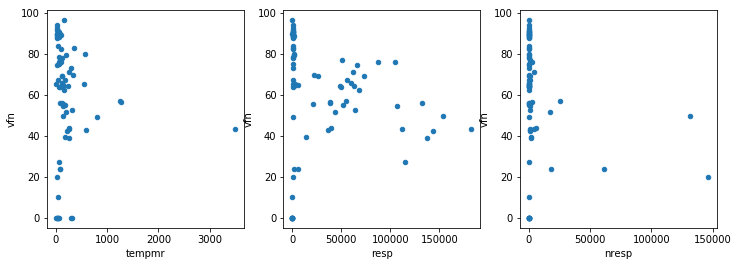

In [8]:
img_vfn, axes = plt.subplots(1,3,figsize=(12,4))
df_final[['vfn','tempmr']].plot.scatter(x='tempmr',y='vfn',ax=axes[0])
df_final[['vfn','resp']].plot.scatter(x='resp',y='vfn',ax=axes[1])
df_final[['vfn','nresp']].plot.scatter(x='nresp',y='vfn',ax=axes[2])
img_vfn

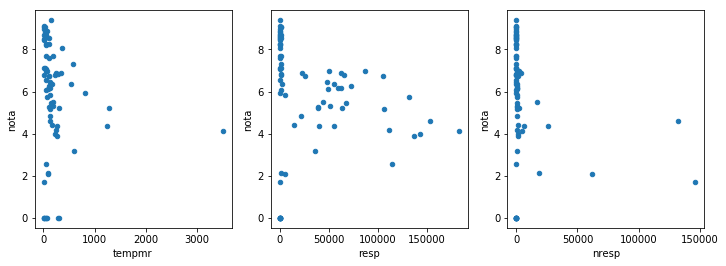

In [9]:
img_nota, axes = plt.subplots(1,3,figsize=(12,4))
df_final[['nota','tempmr']].plot.scatter(x='tempmr',y='nota',ax=axes[0])
df_final[['nota','resp']].plot.scatter(x='resp',y='nota',ax=axes[1])
df_final[['nota','nresp']].plot.scatter(x='nresp',y='nota',ax=axes[2])
img_nota

In [73]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols("vfn ~ resp + nresp + tempmr",data=df_final)
result_vfn = model.fit()
pd.concat([result.params,result.bse,result.tvalues,result.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

,coef,SE,t,p-value
Intercept,6.249423,0.373963,16.711321,1.169815e-26
resp,-0.000006,0.000007,-0.763728,4.474905e-01
nresp,-0.000026,0.000013,-1.945781,5.553119e-02
tempmr,-0.000525,0.000741,-0.708844,4.806791e-01


In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols("nota ~ resp + nresp + tempmr",data=df_final)
result_nota = model.fit()
pd.concat([result.params,result.bse,result.tvalues,result.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

,coef,SE,t,p-value
Intercept,6.249423,0.373963,16.711321,1.169815e-26
resp,-0.000006,0.000007,-0.763728,4.474905e-01
nresp,-0.000026,0.000013,-1.945781,5.553119e-02
tempmr,-0.000525,0.000741,-0.708844,4.806791e-01


In [69]:
model2 = smf.ols("vfn ~ resp",data=df_final)
result2 = model2.fit()
pd.concat([result2.params,result2.bse,result2.tvalues,result2.pvalues],
          axis=1, keys=['coef','SE','t','p-value'])

,coef,SE,t,p-value
Intercept,62.112030,3.899919,15.926494,9.009174e-26
resp,-0.000073,0.000072,-1.012692,3.144634e-01


In [75]:

result_vfn.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    vfn   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.427
Date:                Fri, 08 Dec 2017   Prob (F-statistic):              0.242
Time:                        17:56:15   Log-Likelihood:                -363.78
No. Observations:                  77   AIC:                             735.6
Df Residuals:                      73   BIC:                             744.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.3409      3.968     15.963      0.000      55.433      71.249
resp       -3.493e-05   7.89e-05     -0.443      0.659      -0.000       0.000
nresp         -0.0002      0.000     -1.733      0.087      -0.001    3.63e-05
tempmr        -0.0048      0.008     -0.613      0.542      -0.020       0.011
==============================================================================
Omnibus:                       15.587   Durbin-Watson:                   0.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.078
Skew:                          -1.162   Prob(JB):                     0.000119
Kurtosis:                       3.483   Cond. No.                     6.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
df_final_tree = pd.read_csv('tabela_recaqui_tratado.csv', sep=';', encoding='utf-8-sig',
                  usecols=[2,4,6,7,9,21])
print(df_final.shape)
df_final_tree.head()

(77, 22)


,vfn,nota,resp,nresp,tempmr,rep
0,83.0,8.08,649,1,355,otimo
1,96.5,9.38,112,4,153,otimo
2,65.5,9.06,1090,0,8,otimo
3,73.0,6.82,960,53,285,regular
4,90.0,8.86,581,6,75,otimo


In [92]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=10,criterion='entropy')
attrs = ['vfn','resp','nresp','tempmr']
model.fit(df_final_tree[attrs],df_final_tree.rep)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

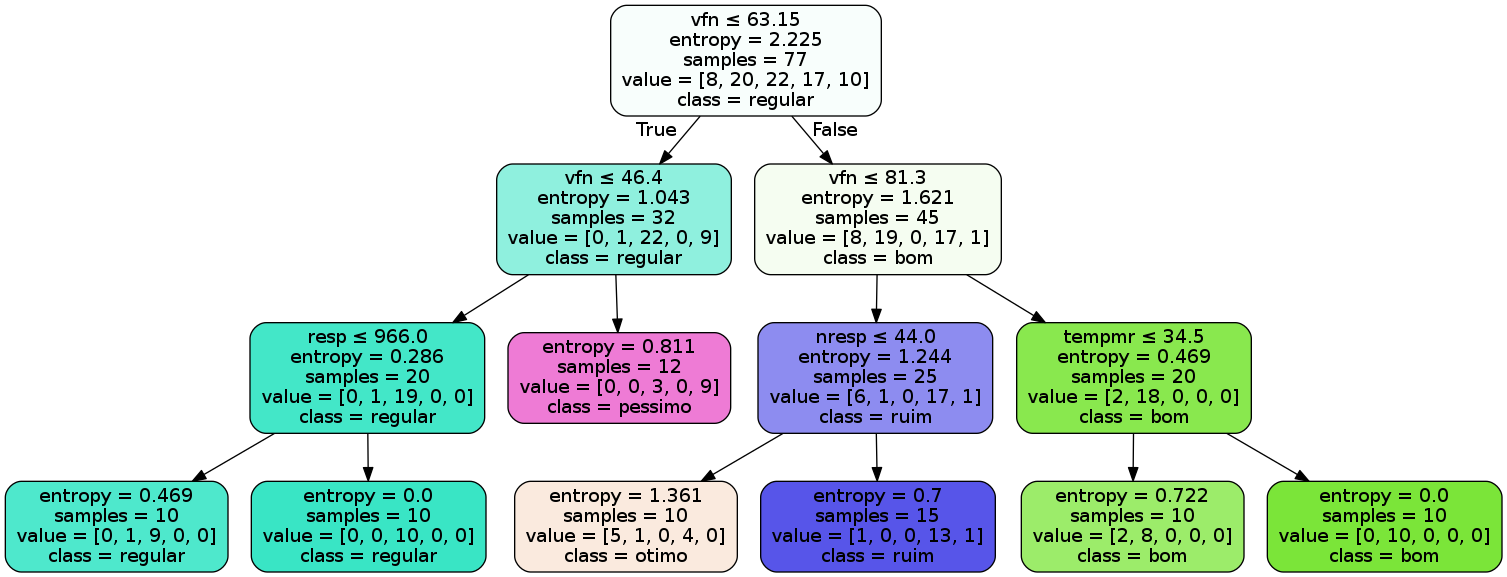

In [93]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(model, out_file=None, 
                         feature_names=attrs,  
                         class_names=['otimo','bom','regular','ruim','pessimo'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
from io import StringIO
import subprocess
f = StringIO(dot_data)
g = gviz.Source(source=dot_data)
from IPython.display import Image
Image(g.pipe(format='png'),width='100%')